# Crevical Cancer Risk Factors

## 1. Data preprocessing and cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.decomposition import PCA


from pandas import read_csv
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from scipy.stats import boxcox

from pandas.api.types import CategoricalDtype

from time import time
from datetime import timedelta

from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
sns.set()

### 1.0 Dataset information

This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The
features cover demographic information, habits, and historic medical records of 858 patients. It was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

There's a total amount of 858 instances and 36 attributes (both numerical and categorical).

### 1.1 Reading the chosen dataset

After inspecting the file `risk_factors_cervical_cancer.csv` and inspecting it, we read it using the following settings:

In [2]:
data = pd.read_csv("risk_factors_cervical_cancer.csv", header=0, delimiter=',', na_values='?')

In this study, there are 4 target variables: `Hinselmann`, `Schiller`, `Citology` and `Biopsy`, located in the last 4 columns of the dataframe. These are 4 different diagnostic tests that have two possible values, therefore this is a classification problem. 

The rest of the variables are listed below:

In [3]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### 1.2 Basic inspection of the dataset 

Let's perform a first simple inspection of the dataset in order to: 
 - Find possible errors and abnormal values (outliers)
 - Find missing values
 - Decide the type of each variable (numerical or categorical)

In [4]:
data.shape
data.describe()[0:8]

(858, 36)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We find that: `Smokes`, `Hormonal Contraceptives`, `IUD`, `STDs`, `STDs:condylomatosis`, `STDs:cervical condylomatosis`, `STDs:vaginal condylomatosis`, `STDs:vulvo-perineal condylomatosis`, `STDs:syphilis`, `STDs:pelvic inflammatory disease`, `STDs:genital herpes`, `STDs:molluscum contagiosum`, `STDs:AIDS`, `STDs:HIV`, `STDs:Hepatitis B`, `STDs:HPV`, `Dx:Cancer`, `Dx:CIN`, `Dx:HPV`, `Dx`, `Hinselmann`, `Schiller`, `Citology` and `Biopsy`
are categorical attributes and will need to be treated properly.

Checking the table above, we cannot see any anomaly of any type. 

In [5]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


However, we can see how there are a lot of missing values. Next we are going to deal with these values.

### 1.3 Dealing with missing values

The easiest way to deal with missing values would be deleting the involved rows or columns. However, the amount of missing values is significantly big and this would cause the loss of lots of relevant data as we can see below:

In [6]:
data.shape
data.isna().sum()

(858, 36)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [7]:
data_drop_all = data.dropna()
data_drop_all.shape
data_drop_all.isna().sum()

(59, 36)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Therefore, we must find another way to solve this problem without losing a considerable amount of instances. 

Data imputation makes no sense in our case, so the best approach might be deleting each instance containing missing values but without taking into account `STDs: Time since first diagnosis` and `STDs: Time since last diagnosis` as nearly for every instance these values are NaN.

In [8]:
# Delete both columns
data_without_na = data.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
data_without_na.shape
data_without_na = data_without_na.dropna()
data_without_na.shape
data_without_na.isna().sum()

(858, 34)

(668, 34)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Dealing with missing values, he have lost around 200 instances and 2 attributes.

In [9]:
RiskFactors = data_without_na

### 1.4 Finding outliers

In order to find outliers we will, for each numerical variable, plot its historgram and boxplot.

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Age'}>], dtype=object)

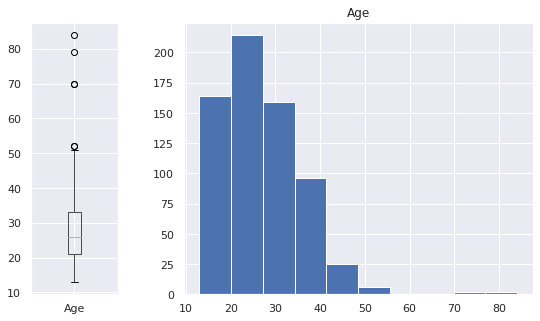

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Number of sexual partners'}>],
      dtype=object)

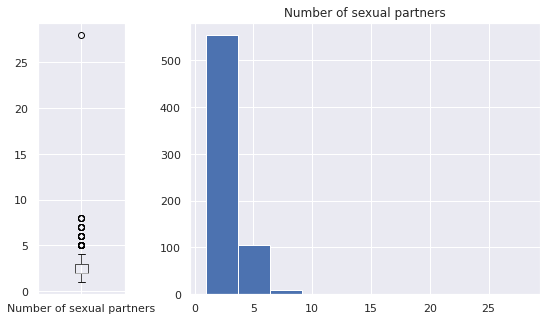

<AxesSubplot:>

array([<AxesSubplot:title={'center':'First sexual intercourse'}>],
      dtype=object)

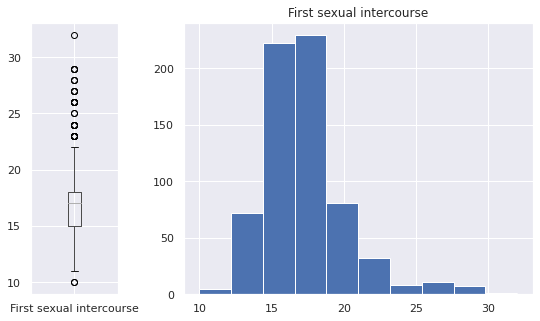

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Num of pregnancies'}>], dtype=object)

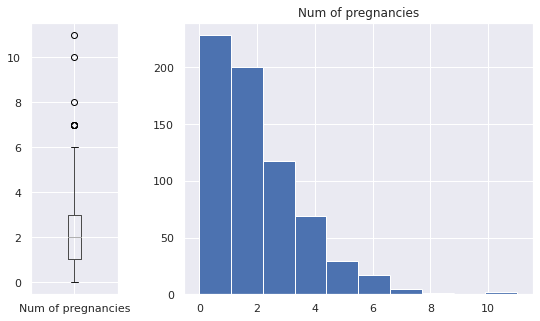

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Smokes (years)'}>], dtype=object)

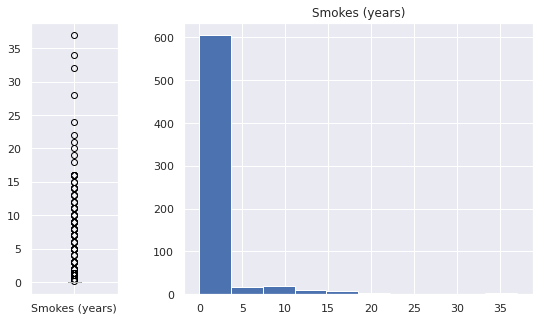

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Smokes (packs/year)'}>], dtype=object)

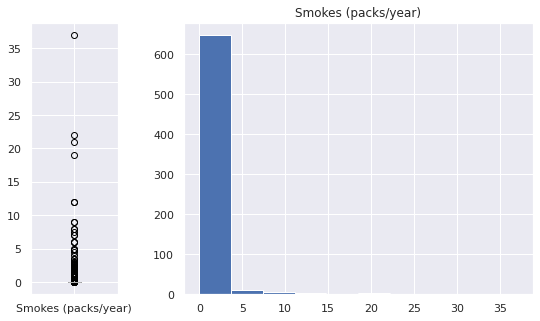

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Hormonal Contraceptives (years)'}>],
      dtype=object)

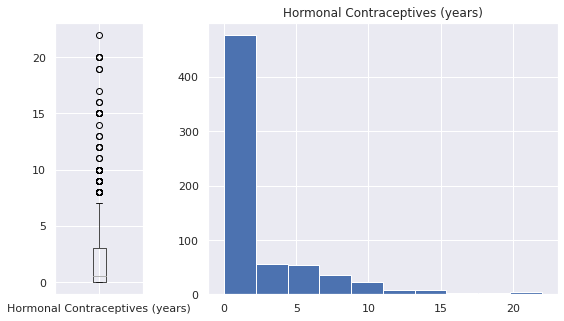

<AxesSubplot:>

array([<AxesSubplot:title={'center':'IUD (years)'}>], dtype=object)

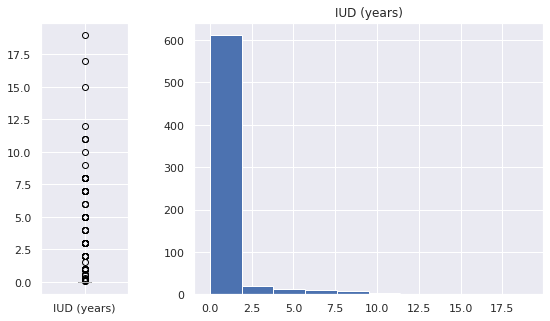

<AxesSubplot:>

array([<AxesSubplot:title={'center':'STDs (number)'}>], dtype=object)

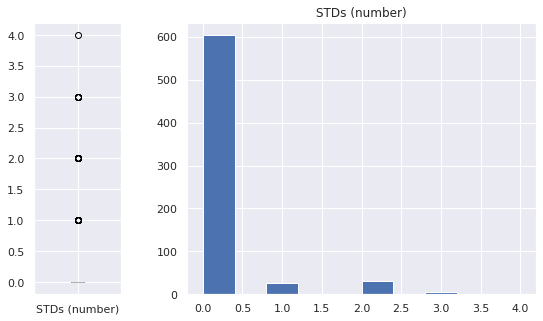

<AxesSubplot:>

array([<AxesSubplot:title={'center':'STDs: Number of diagnosis'}>],
      dtype=object)

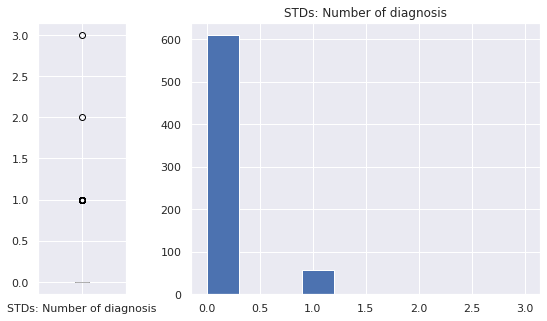

In [10]:
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse',
'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
'STDs: Number of diagnosis']

# Iterate over each numerical variable
for variable in numerical_columns:
    # Create subplots for boxplot and histogram
    fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9, 5))
    
    # Generate boxplot
    RiskFactors.boxplot(column=variable, ax=axes[0])
    # Generate histogram
    RiskFactors.hist(column=variable, ax=axes[1])
    
    # Display the plots
    plt.show()

We conclude various things:
- Values that fall really far from the boxplot in `Age`, `Number of sexual partners` and `Smokes (packs/year)` will have to be deleted
- `First sexual intercourse` and `Num of pregnancies` don't need to be corrected
- The rest of variables present trouble in interpretation and visualization of the plots, as lots of values are 0. This occurs due to the fact that people who don't smoke, haven't had an IUD and have not contracted an STD are the vast majority

In [11]:
zero_counts = RiskFactors[numerical_columns].eq(0).sum()
zero_counts = zero_counts[zero_counts > 0]
zero_counts.sort_values(ascending=False, inplace=True)

print("Variables with a substantial number of 0 values:")
zero_counts

Variables with a substantial number of 0 values:


STDs: Number of diagnosis          609
STDs (number)                      603
IUD (years)                        593
Smokes (years)                     572
Smokes (packs/year)                572
Hormonal Contraceptives (years)    238
Num of pregnancies                  14
dtype: int64

We will first remove the observations mentioned from `Age`, `Number of sexual partners` and `Smokes (packs/year)`, and then plot again all the numerical variables taking into account the last conclusion mentioned.

In [12]:
age_over_50 = RiskFactors[RiskFactors['Age'] > 50]
print(age_over_50['Age'].sort_values())

max_partners = RiskFactors['Number of sexual partners'].max()
print(RiskFactors[RiskFactors['Number of sexual partners'] == max_partners].index)

max_packs = RiskFactors['Smokes (packs/year)'].max()
print(RiskFactors[RiskFactors['Smokes (packs/year)'] == max_packs].index)

6      51
3      52
671    52
676    70
682    70
667    79
668    84
Name: Age, dtype: int64
Int64Index([467], dtype='int64')
Int64Index([3], dtype='int64')


Observations 676, 682, 667, 668 and 467 fall to far away from the rest so they will be deleted.

In [13]:
RiskFactors = RiskFactors.drop([676, 682, 667, 668, 467, 3])

In [14]:
def numerical_plots(df, columns):
    # Iterate over each numerical variable
       for variable in columns:
            # Create subplots for boxplot and histogram
            fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9, 5))
    
            # Filter out the 0 values for specific variables
            if variable in ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']:
                filtered_data = df[df[variable] != 0]
            else:
                filtered_data = df
    
            # Generate boxplot
            filtered_data.boxplot(column=variable, ax=axes[0])    
            # Generate histogram
            filtered_data.hist(column=variable, ax=axes[1])
    
            # Display the plots
            plt.show()

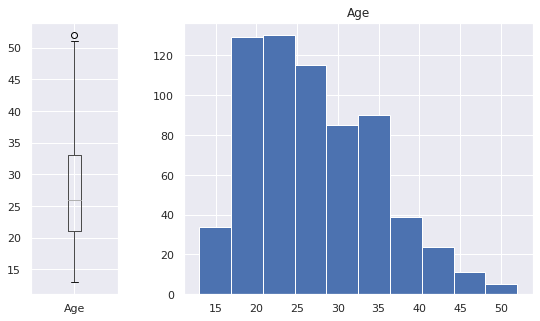

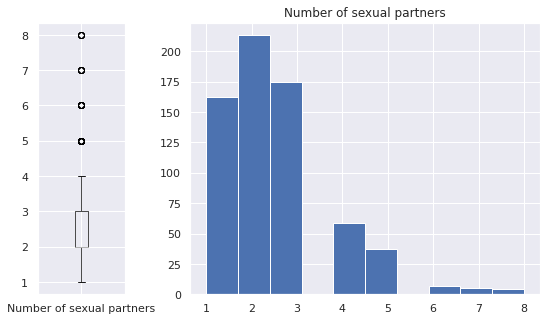

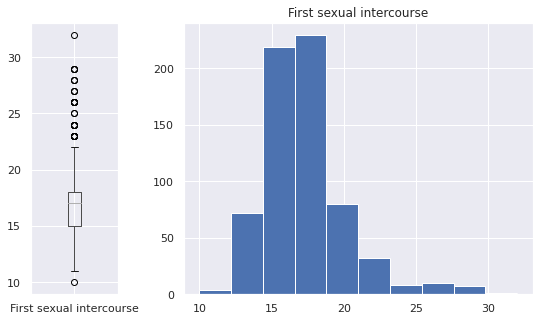

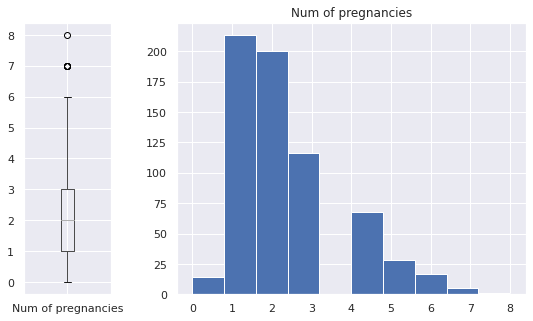

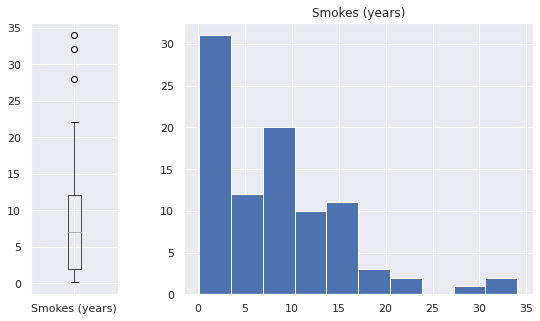

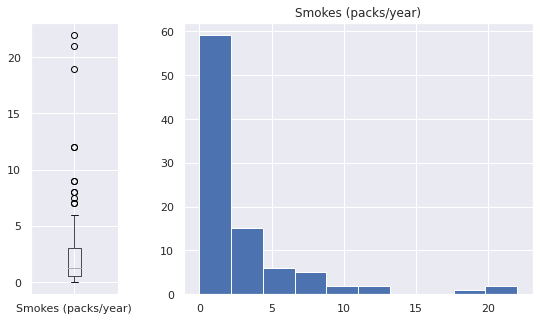

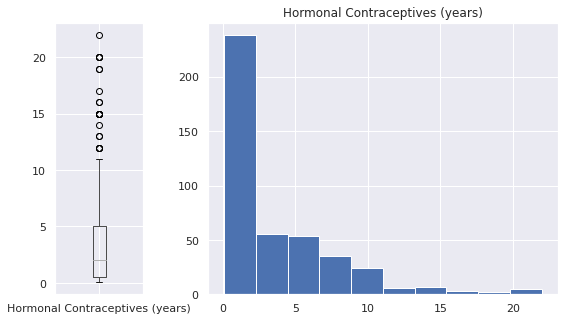

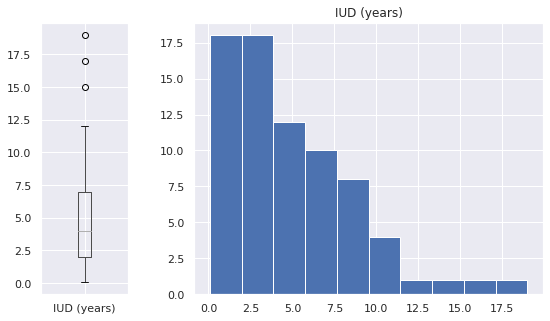

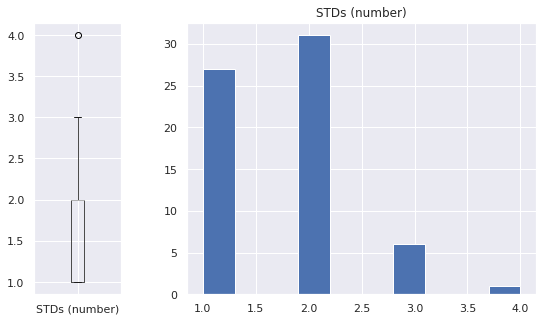

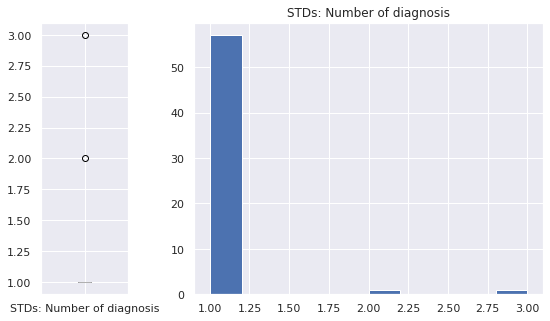

In [15]:
numerical_plots(RiskFactors, numerical_columns)

We can now see a better representation of the numerical variables. We have then reached to the conlcusion that as for `Smokes (years)`, `Smokes (packs/year)`, `Hormonal Contraceptives (years)`, `IUD (years)`, `STDs (number)` and `STDs: Number of diagnosis` the values that are equal to 0 are the vast majority, we should make new discrete features considering values =0 and >0. However, `Smokes`, `Hormonal Contraceptives`, `IUD`, and `STDs` already exist and capture the presence or absence of any risk factor, so there's no point on doing so. Next step will be deleting these variables from the dataset

In [16]:
RiskFactors.drop(['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis'], axis=1, inplace=True)
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies']

### 1.5 Treatment of mixed data types

Originally, the idea of this project was to study the 4 target variable cases separately, but due to the lack of time only one case will be studied. Therefore, `Hinselmann`, `Citology`, `Schiller` and `Biopsy` will be deleted from the dataframe, and we will create a new variable `Cancer` that will exclusively focus on whether the patient has cancer or not. 

Note that our new target variable `Cancer` specifically indicates whether a patient has been diagnosed with cancer or not. The variables `Dx:Cancer` and `Dx` provide additional diagnostic information but may not directly represent the presence or absence of cancer. `Dx:Cancer` could indicate a specific diagnosis related to cancer, while `Dx` represents a general diagnosis that may include various conditions, including cancer.

In [17]:
RiskFactors['Cancer'] = (RiskFactors['Hinselmann'] | RiskFactors['Schiller'] | RiskFactors['Citology'] | RiskFactors['Biopsy']).astype(int)

variables_to_remove = ['Hinselmann', 'Citology', 'Schiller', 'Biopsy']

# Delete the columns with the lowest count from the dataframe
RiskFactors.drop(columns=variables_to_remove, inplace=True)

# We update the variable categorical_columns
categorical_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
                       'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                       'STDs:genital herpes', 'STDs:molluscum contagiosum',
                       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
                       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

In [18]:
RiskFactors.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Hormonal Contraceptives               float64
IUD                                   float64
STDs                                  float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                             float64
STDs:HIV                              float64
STDs:Hepatitis B                      float64
STDs:HPV                              float64
Dx:Cancer                               int64
Dx:CIN                            

As we found out while performing a basic inspection of the dataset, some of the variables are categorical and need to be treated properly. To do so, we have two options: we could assign 'object' datatype to these variables as seen in class, even though there is a specific categorical datatype in pandas (to True/False), or we could encode them as 0,1 integers.

In [19]:
categorical_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
                       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                       'STDs:genital herpes', 'STDs:molluscum contagiosum',
                       'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
                       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

RiskFactors[categorical_columns] = RiskFactors[categorical_columns].astype('object')
RiskFactors[categorical_columns] = RiskFactors[categorical_columns].replace({0.0: "False", 1.0: "True"}) 
RiskFactors.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Cancer
0,18,4.0,15.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,15,1.0,14.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,46,3.0,21.0,4.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
5,42,3.0,23.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
6,51,3.0,17.0,6.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


However, we will stick to 0/1 values as this way we can have our categorical variables properly encoded (as integers this time, not floats as originally).

In [20]:
RiskFactors[categorical_columns] = RiskFactors[categorical_columns].replace({"False": 0, "True": 1}) 
RiskFactors['Cancer'] = RiskFactors['Cancer'].replace({"False": 0, "True": 1}) 
RiskFactors.head()
RiskFactors.describe()
RiskFactors.shape

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Cancer
0,18,4.0,15.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,3.0,21.0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Cancer
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.0,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.0,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,26.951662,2.481873,17.138973,2.293051,0.138973,0.648036,0.111782,0.098187,0.055891,0.0,0.006042,0.054381,0.022659,0.001511,0.001511,0.001511,0.0,0.019637,0.001511,0.003021,0.024169,0.004532,0.022659,0.024169,0.128399
std,7.822971,1.309388,2.822327,1.394363,0.346180,0.477944,0.315337,0.297793,0.229885,0.0,0.077556,0.226939,0.148925,0.038866,0.038866,0.038866,0.0,0.138856,0.038866,0.054923,0.153690,0.067216,0.148925,0.153690,0.334786
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,8.000000,32.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(662, 25)

We can see how for each categorical variable, values take two possible values (0/1). However the columns `STDs:cervical condylomatosis` and `STDs:AIDS` only take one value (0). Therefore, we conclude these two variables take no effect on the study we are realizing.

In [21]:
RiskFactors = RiskFactors.drop(columns=['STDs:cervical condylomatosis', 'STDs:AIDS'])

# We update out categorical_columns storage variable
categorical_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
                       'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 
                       'STDs:vulvo-perineal condylomatosis',
                       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                       'STDs:genital herpes', 'STDs:molluscum contagiosum',
                       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
                       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

Now, all variables are in their correct dataype. After the changes done to the dataframe so far, let's compare the differences with the output above (`RiskFactors.describe()` and `RiskFactors.shape`):

In [22]:
data.shape
data.describe()[0:8]

(858, 36)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This let's us conclude that after performing a data exploration, we are left with a dataframe containing 662 instances and 25 variables to work with.

Following up, the next step will be normalization, but let's treat the mixed data types first.

### 1.6 Normalization

In order to not have variables of ranges too far away we will normalize our data to force all the variables to have the same range.

Although variables seem to be discrete, not all of them are. Only `Age`, `Number of sexual partners`, `First sexual intercourse`, `Num of pregnancies`, `STDs (number)` and `STDs: Number of diagnosis` are so, while `Smokes (years)`, `Smokes (packs/year)`, `Hormonal Contraceptives (years)` and `IUD (years)` are actually continous. As we have seen, some of these variables have values equal to 0, as for example `Num of pregnancies`, which can't be deleted to help normalize. For that reason, we won't be able to simply apply a Box-Cox transformation, but we will add a small non-zero value to avoid the logarithm of 0. This measure is a common approach when trying to apply Box-Cox in this kind of situation. After that we will scale out data through Min-Max scaling, which will send values to range [0,1].

Before doing so let's preview the normality on the original data. 

In [23]:
def qqplots(df, columns):    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Iterate over each variable and plot the Q-Q plot
    for i, variable in enumerate(columns):
        ax = axes.reshape(-1)[i]
        # Generate Q-Q plot
        stats.probplot(df[variable], dist="norm", plot=ax)

        ax.set_title(f"Q-Q Plot - {variable}")
        ax.set_xlabel("Theoretical Quantiles")
        ax.set_ylabel("Sample Quantiles")

    plt.tight_layout()
    plt.show()

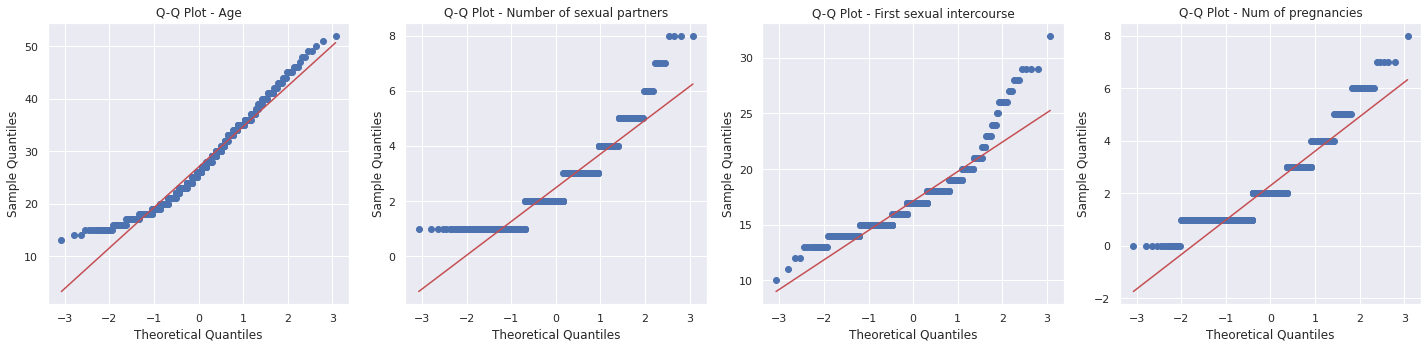

In [24]:
qqplots(RiskFactors, numerical_columns)

As we can see, `Age` (and `Num of pregnancies` more or less) are the only variables that seem to guarantee normality, as other plots show very distant tails.
Let's apply a Box-Cox transformation in order to see if normality improves for the rest of attributes.

In [25]:
# Apply Box-Cox transformation to numerical_columns in RiskFactors
RiskFactors_bc = RiskFactors.copy()
for variable in numerical_columns:
    # Add a small constant value to handle zero values
    epsilon = 0.001
    transformed_data, _ = boxcox(RiskFactors_bc[variable] + epsilon)
    
    # Assign the transformed data back to the dataframe
    RiskFactors_bc[variable] = transformed_data

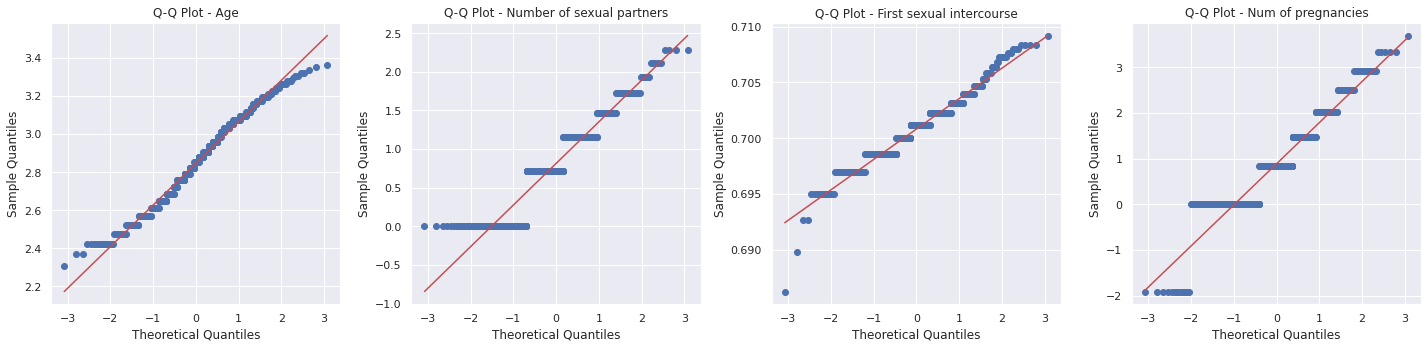

In [26]:
qqplots(RiskFactors_bc, numerical_columns)

We can now see that `Age`, `Number of sexual partners`, `First sexual intercourse` and `Num of pregnancies` show clear signs of normality. We will proceed scaling all the numerical variables through Min-Max scaling.

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
RiskFactors_bc_min_max = RiskFactors_bc.copy()

for column in numerical_columns:
    RiskFactors_bc_min_max[column] = min_max_scaler.fit_transform(RiskFactors_bc[[column]])

In order to visualize our now standarized data let's plot the histogram with the overlapped gaussian and the kernel density estimate (KDE).

In [28]:
def overlapped_gauss(df, columns):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        sigma = df[column].std()
        mu = df[column].mean()

        ax = axs[i]
        count, bins, ignored = ax.hist(df[column], 15, density=True)
        dbins = np.linspace(bins[0], bins[-1])

        ax.set_title(column)
        ax.set_xlabel(column)

        ax.plot(dbins, 1 / (sigma * np.sqrt(2 * np.pi)) *
                 np.exp(-(dbins - mu)**2 / (2 * sigma**2)),
                 linewidth=2, color='r')

    fig.tight_layout()
    plt.show()

In [29]:
def kde_plot(df, columns):
    fig = plt.figure(figsize=(20, 5))
    for i, column in enumerate(columns):
        ax = fig.add_subplot(1, 4, i+1)
        df[column].plot.kde()
        plt.title(column)

    fig.tight_layout()
    plt.show()

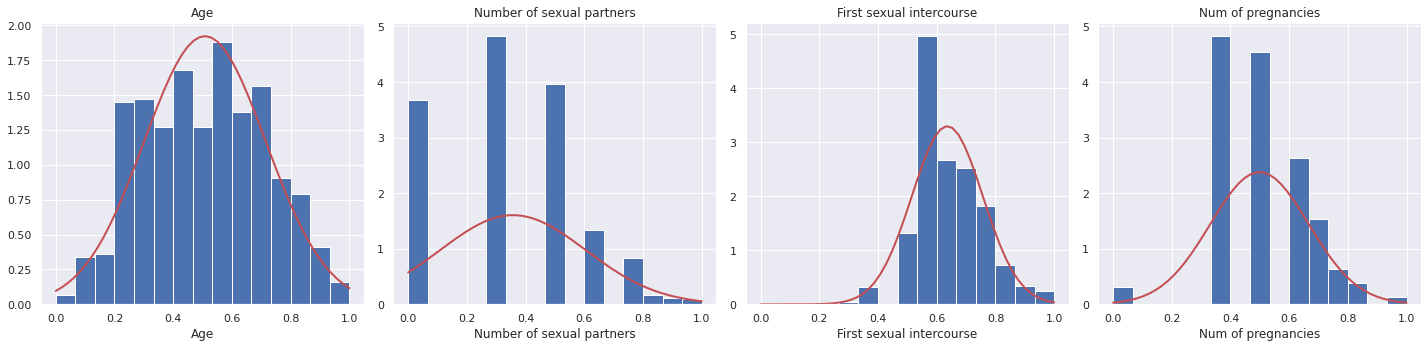

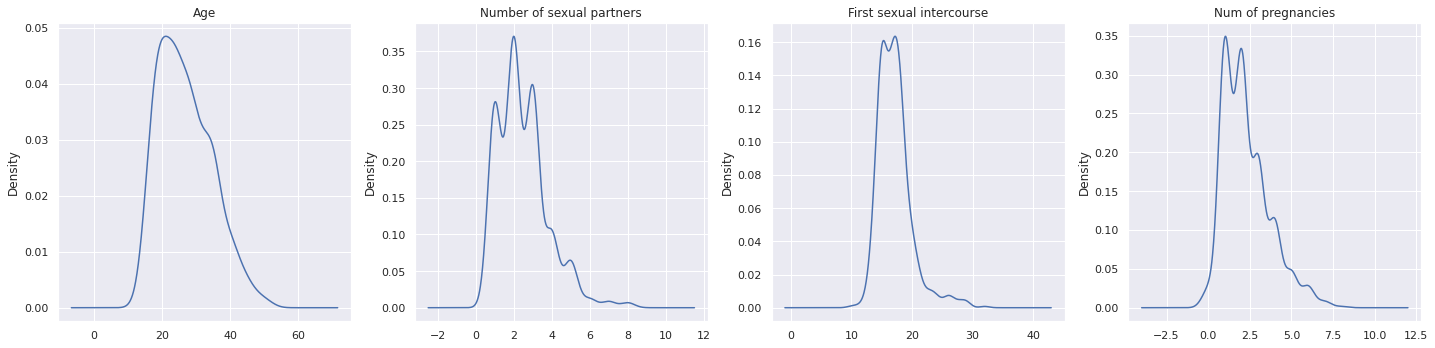

In [30]:
overlapped_gauss(RiskFactors_bc_min_max, numerical_columns)
kde_plot(RiskFactors, numerical_columns) 

We can see that now our data is correctly standarized and we can check once again that previously mentioned attributes show signs of meeting the hypothesis of normality.

### 1.7 Ending the preprocessing

In [31]:
RiskFactors_scaled = RiskFactors_bc_min_max.copy()

Before ending the preprocessing, it is noticeable that as this is dataset is related to disease risks there's a high imbalance in our data. There's a quite little amount of people that test positive on any test. This is reflected in our data, where some variables don't seem to explain much as few (or none) people that tested positive also suffer from other diseases such as `STDs:pelvic inflammatory disease` or `STDs:genital herpes`.

In [32]:
RiskFactors_scaled['Cancer'].value_counts()

0    577
1     85
Name: Cancer, dtype: int64

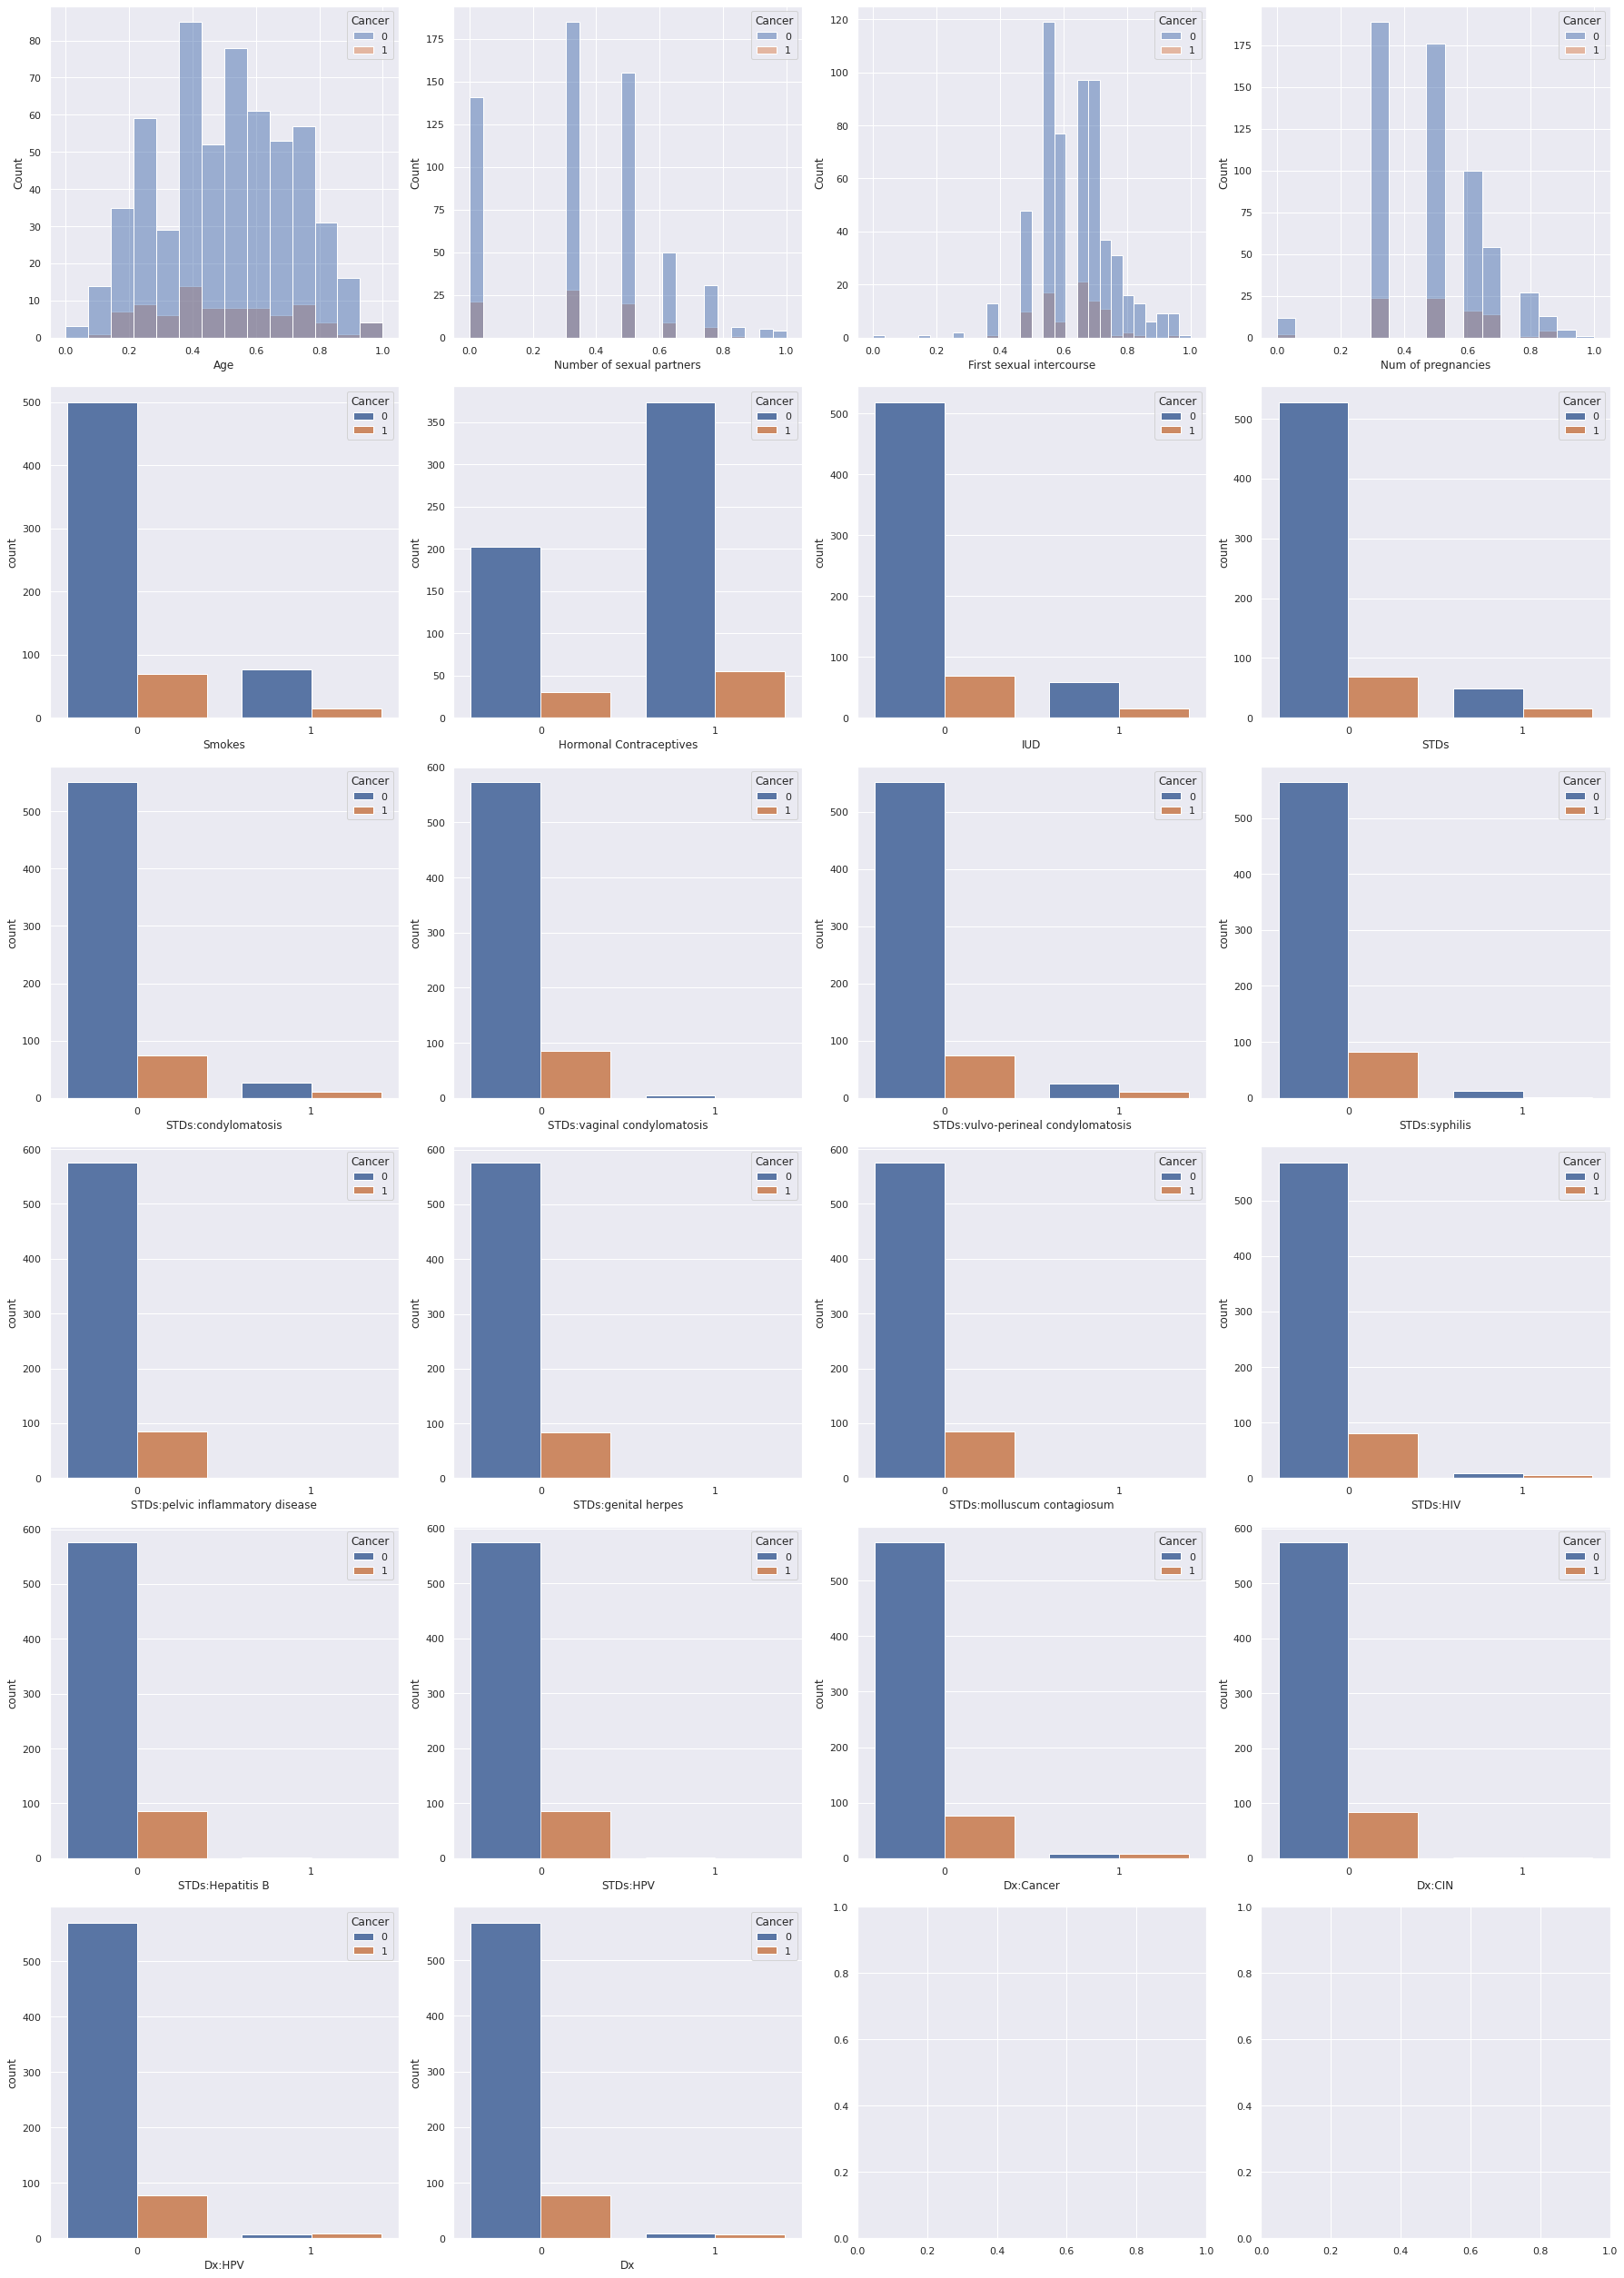

In [33]:
fig, axes = plt.subplots(6,4,figsize=(25,35));

for i, c in enumerate(RiskFactors_scaled.columns[:-1]):
    ax = axes.reshape(-1)[i]
    if c in categorical_columns:
        a = sns.countplot(x=c,data=RiskFactors_scaled, ax=ax, hue='Cancer');
    else: 
        sns.histplot(x=c,data=RiskFactors_scaled, hue='Cancer',ax=ax);
plt.tight_layout();

In order to fix that, let's first verify which variables don't have enough data for them to be considered relevant.

In [34]:
# Create a new DataFrame containing only the relevant columns
aux = RiskFactors_scaled[categorical_columns + ['Cancer']]

# Iterate over each variable in categorical_columns
for variable in categorical_columns:
    # Group the data by 'Cancer' and variable, and calculate the value counts
    counts = aux.groupby(['Cancer', variable]).size().reset_index(name='Count')
    
    # Print the value counts for each 'Cancer' value
    print(f"Variable: {variable}")
    print(counts)
    print()

Variable: Smokes
   Cancer  Smokes  Count
0       0       0    500
1       0       1     77
2       1       0     70
3       1       1     15

Variable: Hormonal Contraceptives
   Cancer  Hormonal Contraceptives  Count
0       0                        0    203
1       0                        1    374
2       1                        0     30
3       1                        1     55

Variable: IUD
   Cancer  IUD  Count
0       0    0    519
1       0    1     58
2       1    0     69
3       1    1     16

Variable: STDs
   Cancer  STDs  Count
0       0     0    528
1       0     1     49
2       1     0     69
3       1     1     16

Variable: STDs:condylomatosis
   Cancer  STDs:condylomatosis  Count
0       0                    0    551
1       0                    1     26
2       1                    0     74
3       1                    1     11

Variable: STDs:vaginal condylomatosis
   Cancer  STDs:vaginal condylomatosis  Count
0       0                            0    573
1    

Based on the provided value counts, the following variables have no observations with a positive 'Cancer' value:
- `STDs:vaginal condylomatosis`
- `STDs:pelvic inflammatory disease`
- `STDs:genital herpes`
- `STDs:molluscum contagiosum`
- `STDs:Hepatitis B`
- `STDs:HPV`

Since these variables have no variability and do not contribute any information to the prediction of `Cancer`, they can be considered as candidates for deletion. Even though the decision of deleting them should be consulted with an expert, we will proceed removing them as they are all STDs and `STDs` already captures their information (and `Dx:HPV` captures specifically `STDs:HPV`).

In [35]:
variables_to_remove = ['STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV']

We also can see that `STDs:condylomatosis` and `STDs:vulvo-perineal condylomatosis` are pretty much identical.

In [36]:
# sns.pairplot(data=RiskFactors_scaled, hue='Cancer'); # takes way too long

Because most of our variables are categorical, we recieve few information from this plot. However, let's explore more options:

 In order to study the correlation between attributes let's plot a heatmap.

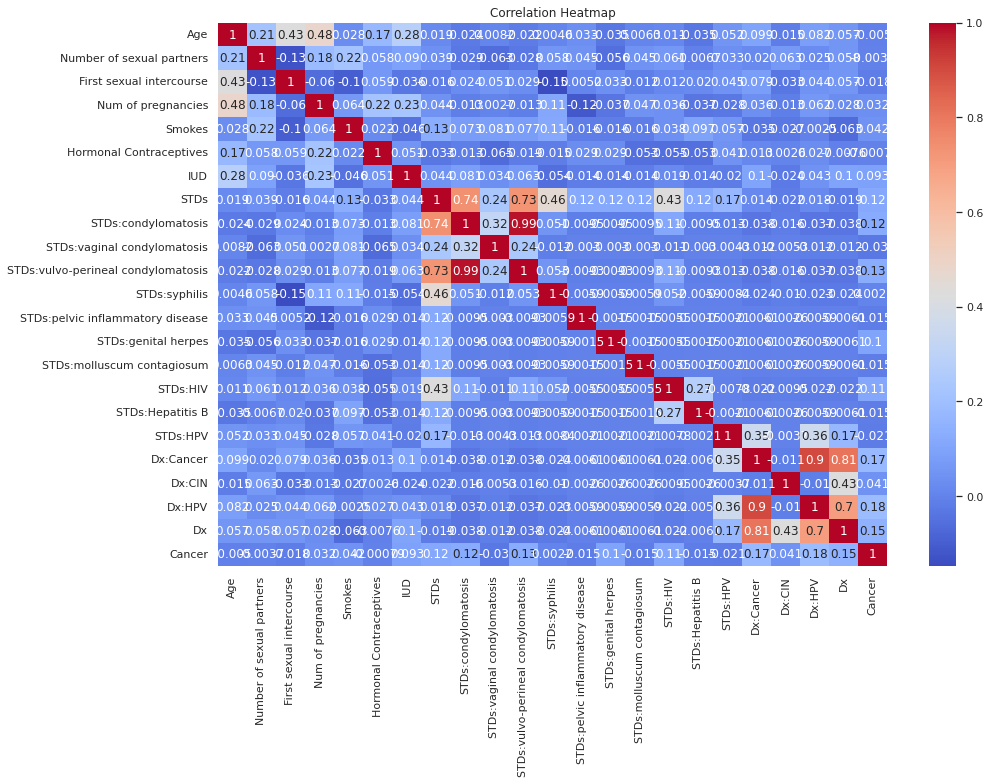

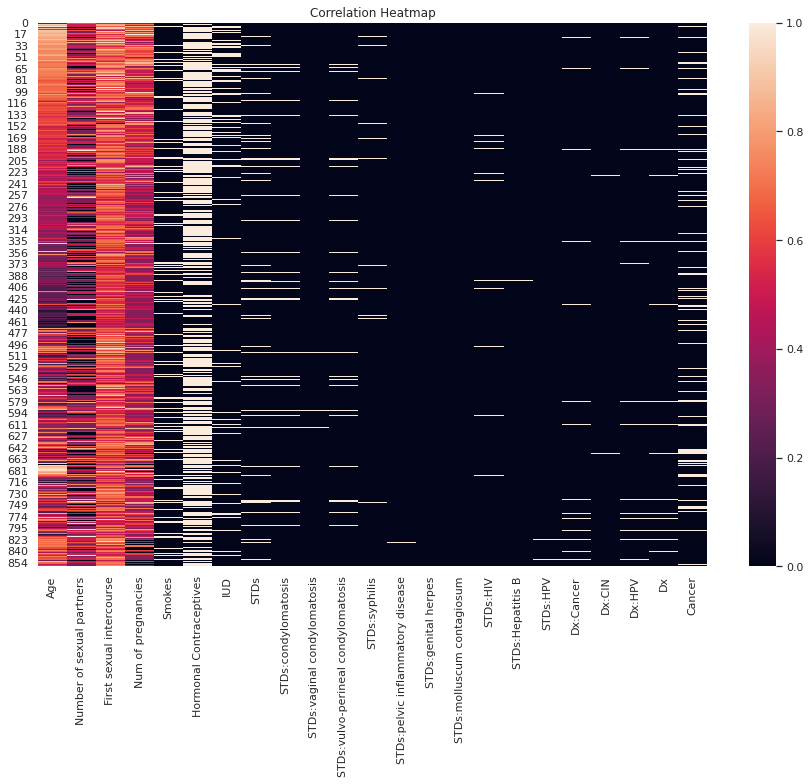

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(RiskFactors_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

plt.figure(figsize=(15, 10))
sns.heatmap(RiskFactors_scaled)
plt.title('Correlation Heatmap')
plt.show();

We conclude that `STDs:vulvo-perineal condylomatosis` is completely irrelevant.

In [38]:
variables_to_remove = variables_to_remove + ['STDs:vulvo-perineal condylomatosis']
RiskFactors_scaled.drop(variables_to_remove, axis=1, inplace=True)

In [39]:
categorical_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
                       'STDs:condylomatosis', 'STDs:syphilis',
                       'STDs:HIV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

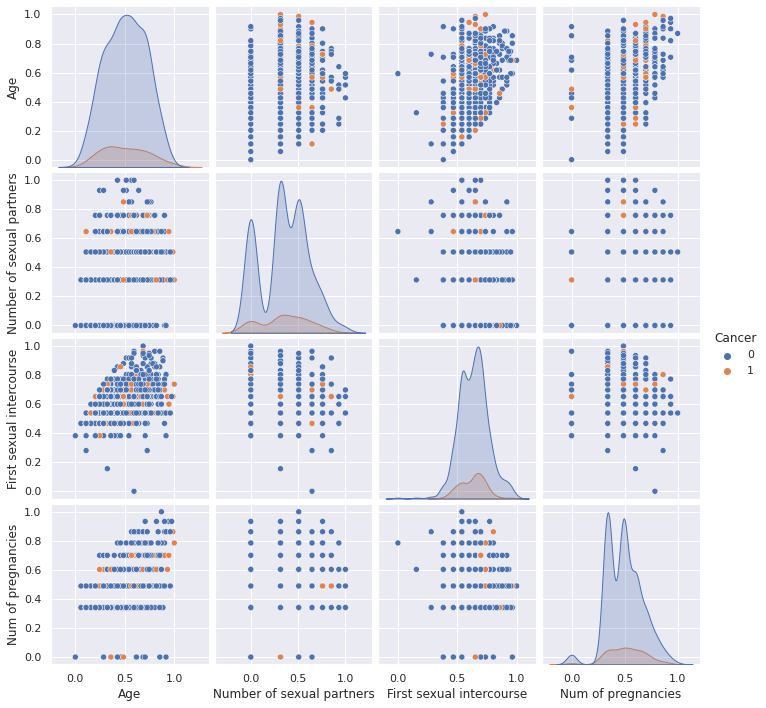

In [40]:
sns.pairplot(data=RiskFactors_scaled[numerical_columns + ['Cancer']], hue='Cancer'); # takes way too long

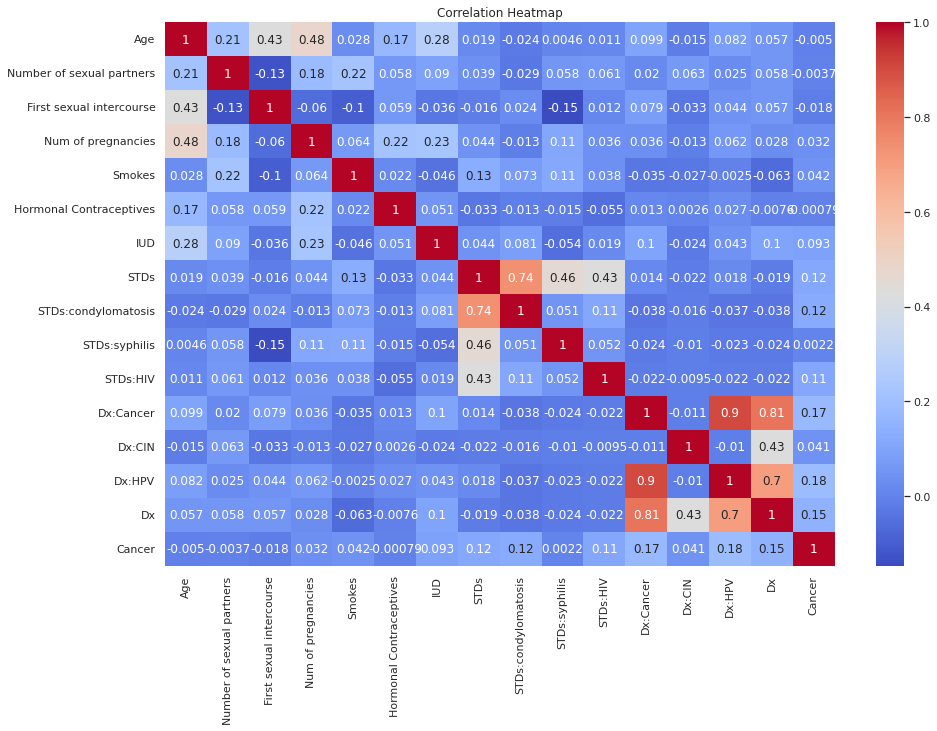

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(RiskFactors_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

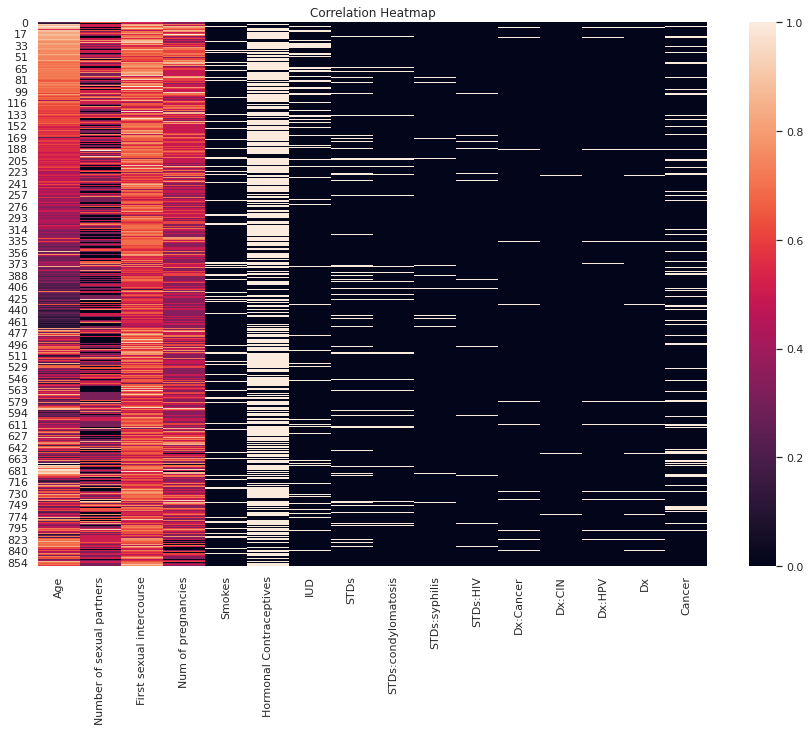

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(RiskFactors_scaled)
plt.title('Correlation Heatmap')
plt.show();

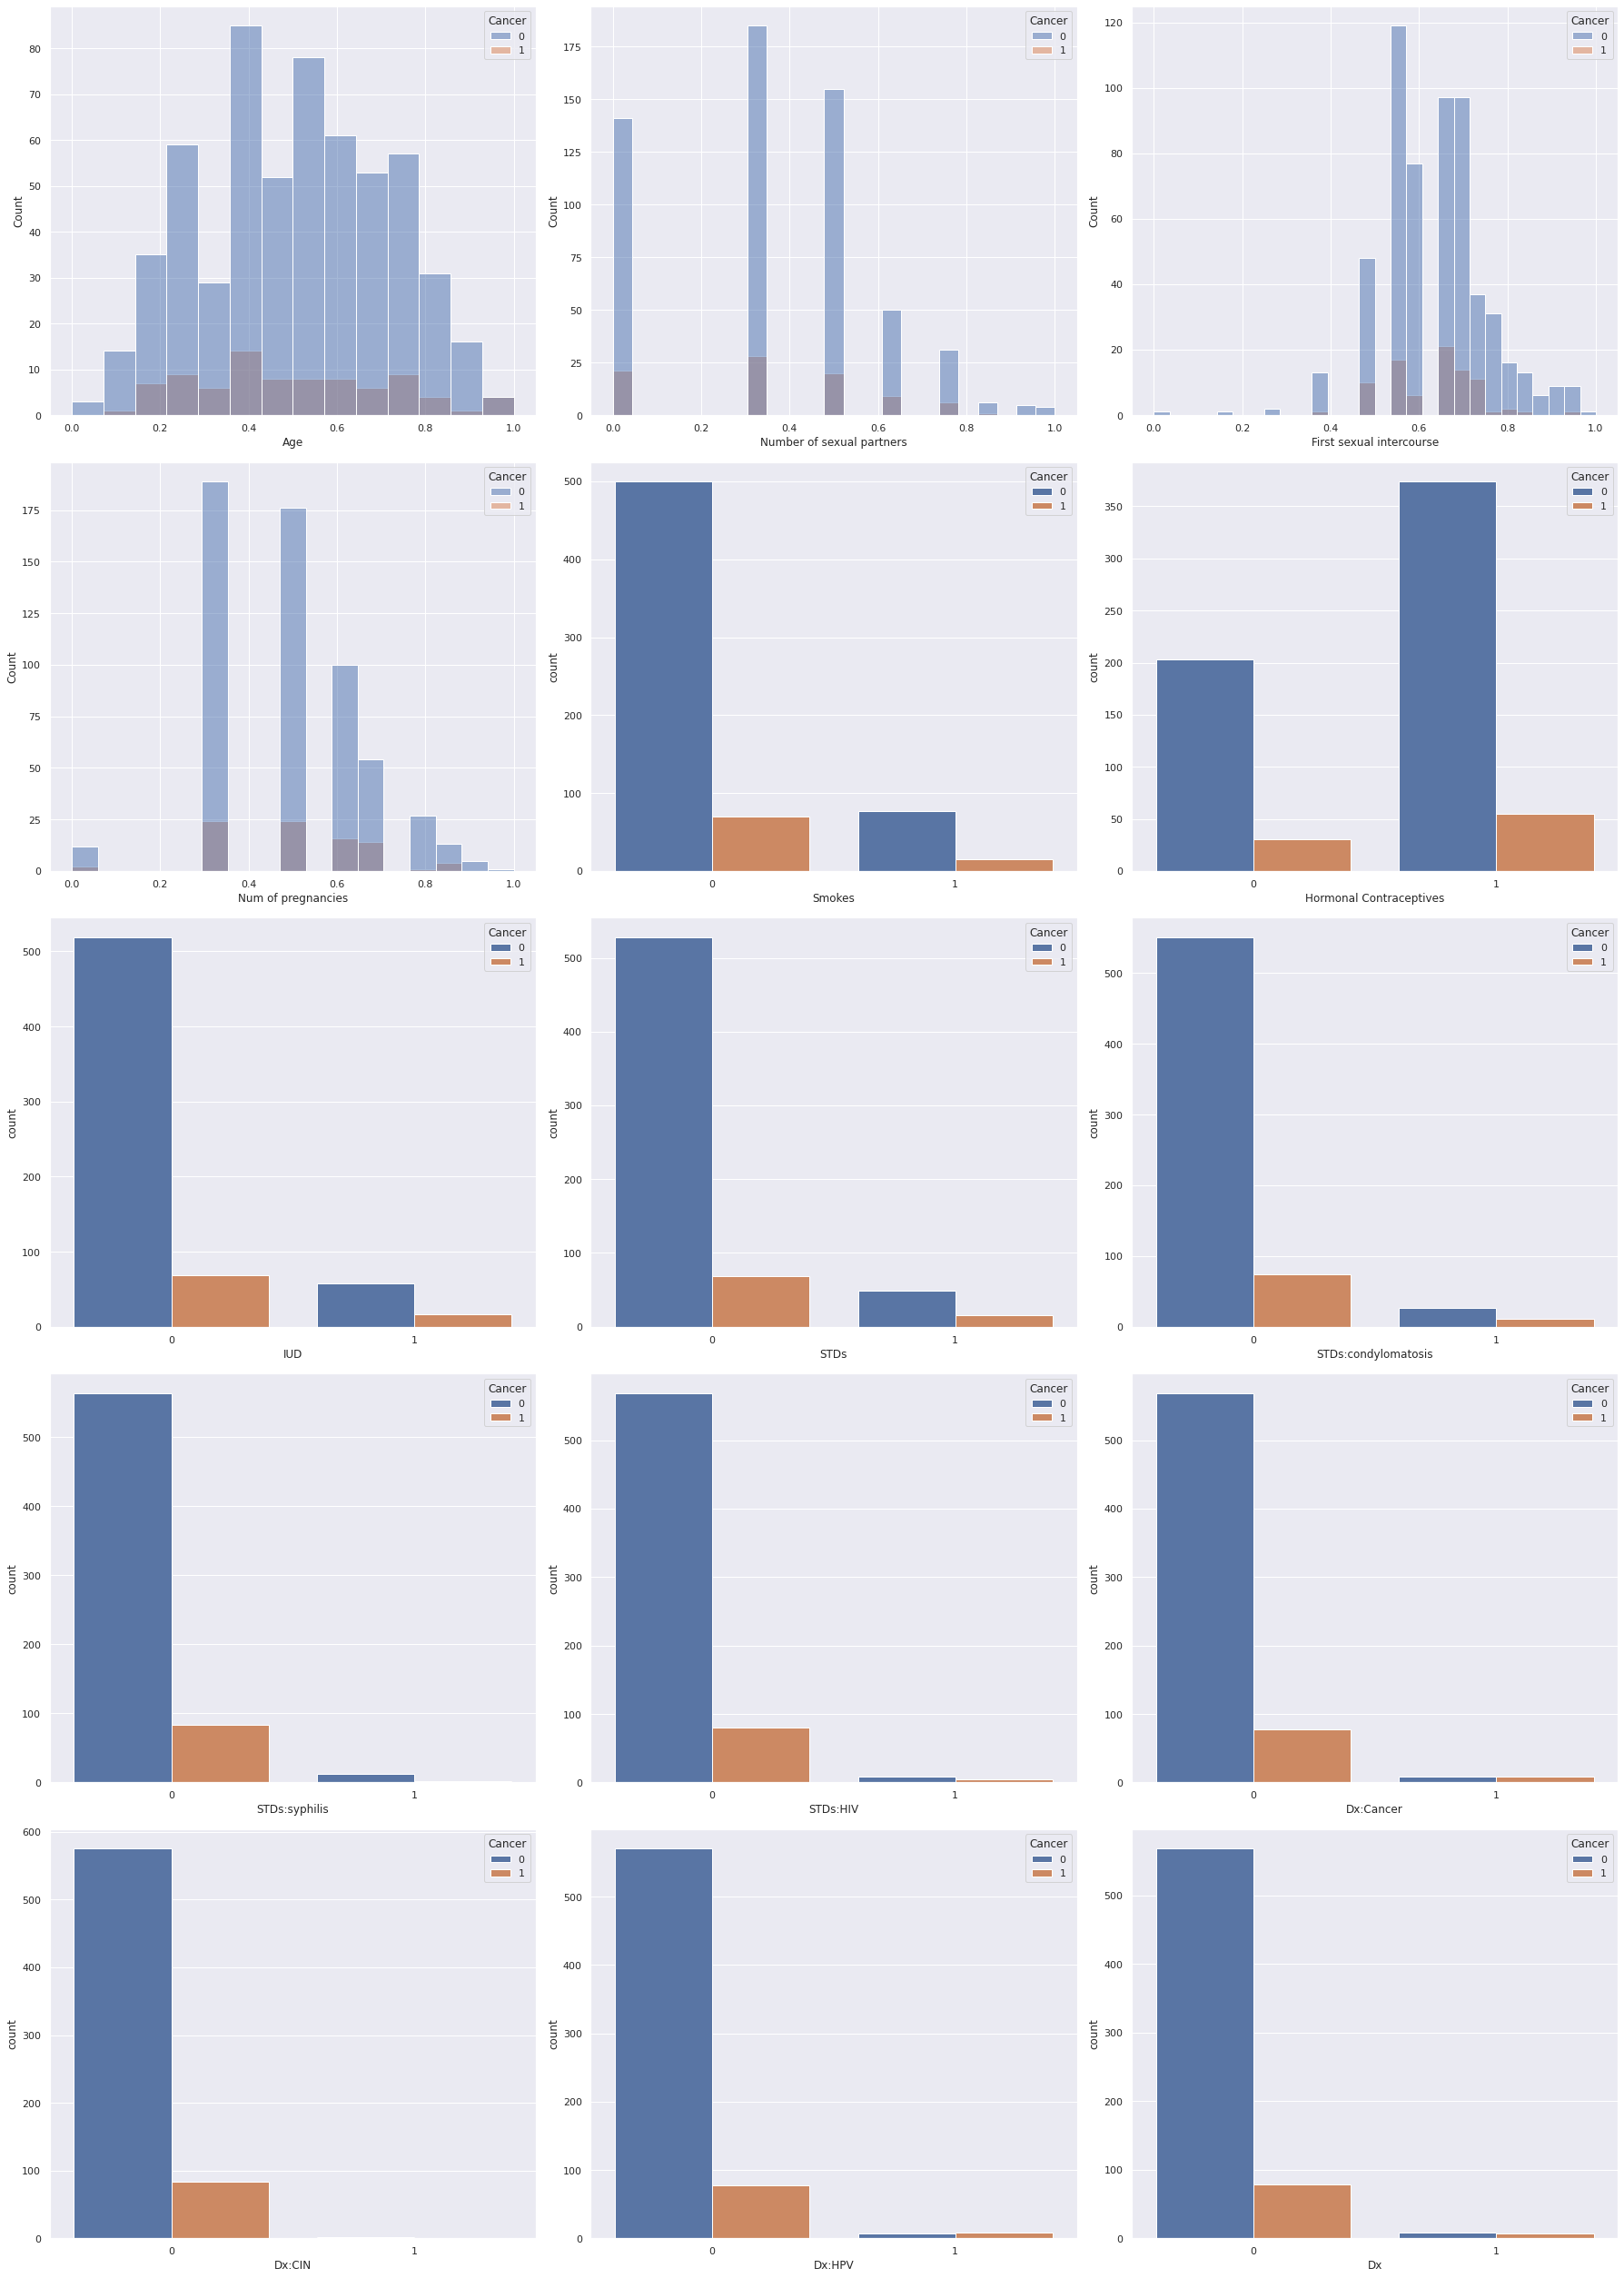

In [43]:
fig, axes = plt.subplots(5,3,figsize=(25,35));

for i, c in enumerate(RiskFactors_scaled.columns[:-1]):
    ax = axes.reshape(-1)[i]
    if c in categorical_columns:
        a = sns.countplot(x=c,data=RiskFactors_scaled, ax=ax, hue='Cancer');
    else: 
        sns.histplot(x=c,data=RiskFactors_scaled, hue='Cancer',ax=ax);
plt.tight_layout();

Finally we make sure to shuffle the data in order to avoid possible ordering biases.

In [44]:
np.random.seed(100)
# Rename dataframe
RiskFactors_scaled = RiskFactors_scaled.sample(frac=1).reset_index(drop=True)

After the preprocessing our data looks like the following.

In [45]:
RiskFactors_scaled.describe()
RiskFactors_scaled.shape

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Cancer
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.508128,0.356824,0.636007,0.499067,0.138973,0.648036,0.111782,0.098187,0.055891,0.022659,0.019637,0.024169,0.004532,0.022659,0.024169,0.128399
std,0.207477,0.248590,0.120999,0.167661,0.346180,0.477944,0.315337,0.297793,0.229885,0.148925,0.138856,0.153690,0.067216,0.148925,0.153690,0.334786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359125,0.313755,0.538760,0.340933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.514483,0.313755,0.652124,0.489183,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684663,0.506124,0.697649,0.603453,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(662, 16)

This will be the preprocessed dataframe that we will use. We count with 662 instances and 16 attributes.

In [46]:
RiskFactors_scaled.to_pickle('RiskFactors_processed.pkl.bz2',compression='bz2')

Nevertheless, let's apply some dimensionality reduction algorithms to find out how does our data behave even though we won't continue modeling using the features extracted from these techniques. By doing so we would reduce the dimensionality and improve the performance significantly, but we would lose the relation with the variables and the target which is our main goal.

### PCA decomposition impact on correlation

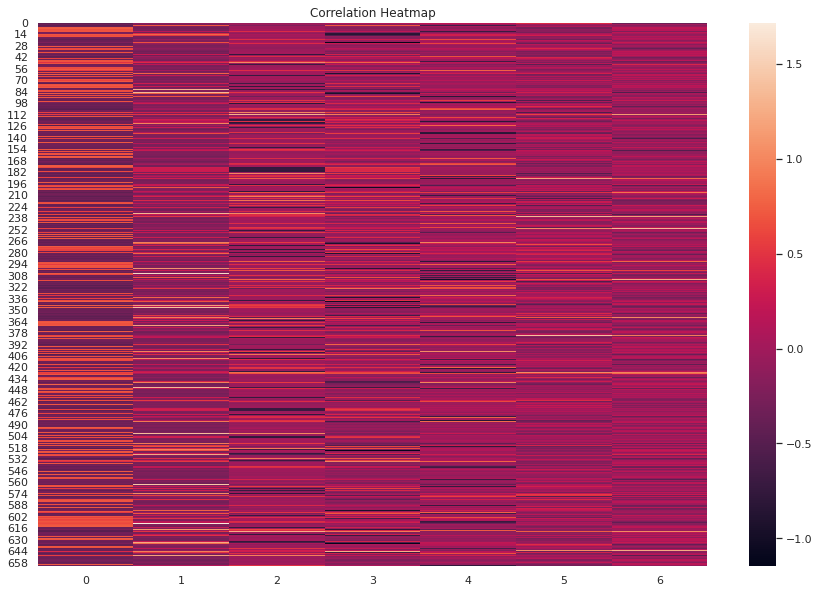

In [47]:
pca = PCA();
# We scale the data to improve PCA performance. 
pca.fit(RiskFactors_scaled);
components = np.sum(np.cumsum(pca.explained_variance_ratio_) <= 0.9)
pca = PCA(n_components=components);
data_pca = pca.fit_transform(RiskFactors_scaled);

plt.figure(figsize=(15, 10))
sns.heatmap(data_pca)
plt.title('Correlation Heatmap')
plt.show();

We can already see a remarkable reduction, counting with just 6 components. Correlation is in general higher now.